# Project Title: Optimizing Customer Segmentation for Targeted Marketing Strategies in a Shopping Mall

# Presenters: Group E
*   Abha Tamrakar
*   Sanket R Khamkar
*   Shivram Edathatta

# Project Description:
The goal of this project is to analyze the shopping mall customer dataset and apply various clustering algorithms to uncover meaningful customer segments. By identifying distinct groups of customers based on their demographic characteristics and shopping behavior, the goal is to develop targeted marketing strategies that can better serve the needs of each customer segment.
The project will involve applying the following clustering techniques:

K-Means Clustering: This algorithm will be used to partition the customers into K distinct clusters based on their Annual Income, Spending Score, Age, and Gender.
Hierarchical Clustering: This method will be used to explore the hierarchical relationships between customers and identify any natural groupings that may exist.
Gaussian Mixture Model (GMM): This probabilistic model-based approach will be used to cluster the customers based on the underlying distribution of the data.

The insights gained from these clustering techniques will be used to develop targeted marketing strategies tailored to the specific needs and preferences of each customer segment. This may include personalized product recommendations, customized promotional offers, and specialized customer service approaches.
By leveraging the power of data-driven customer segmentation, the shopping mall can optimize its marketing efforts, improve customer satisfaction, and ultimately, increase revenue and profitability.

Dataset - https://www.kaggle.com/datasets/zubairmustafa/shopping-mall-customer-segmentation-data


**TOPICS NOT COVERED IN THE CLASS: HIERARCHICAL CLUSTERING**




In [ ]:
import pandas as pd

# Load the data from the uploaded file
file_path = 'shopping-mall-customer-segmentation-data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  
0              89  
1              95  
2              76  
3              57  
4              76

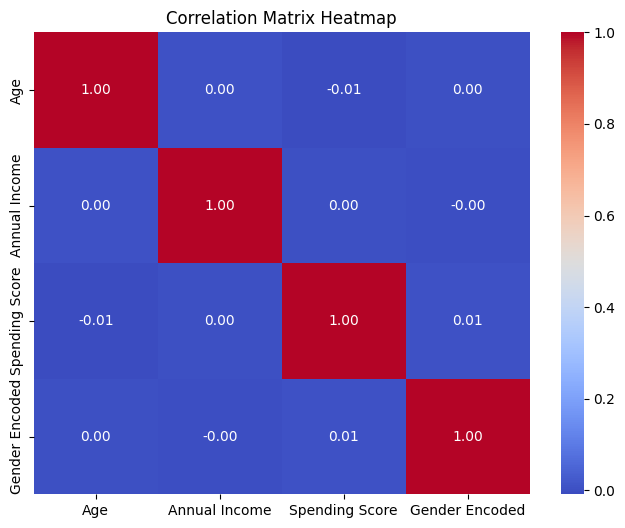

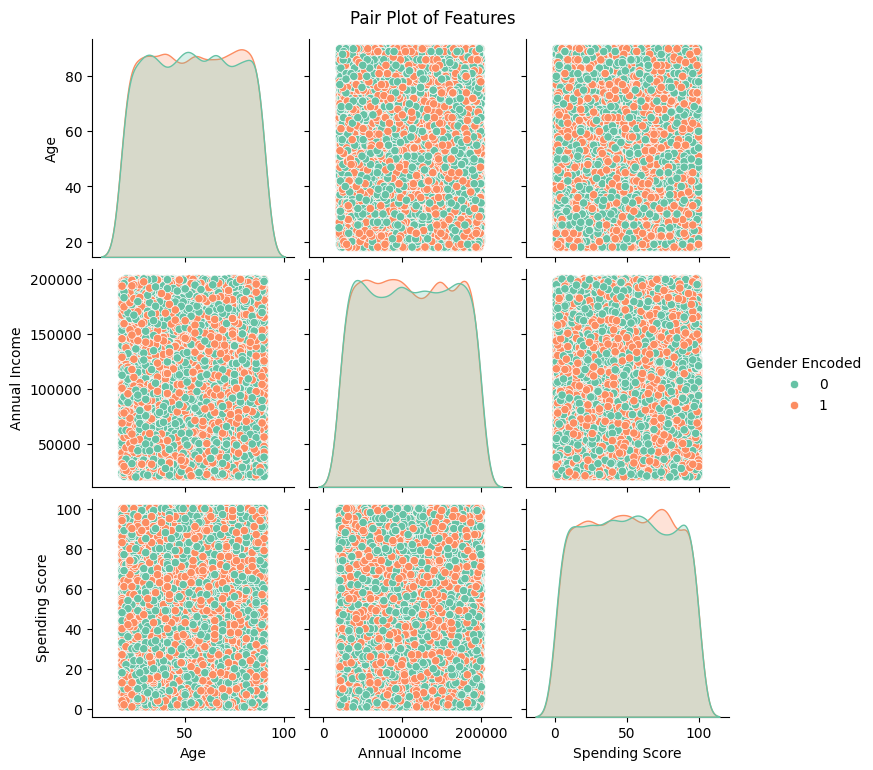

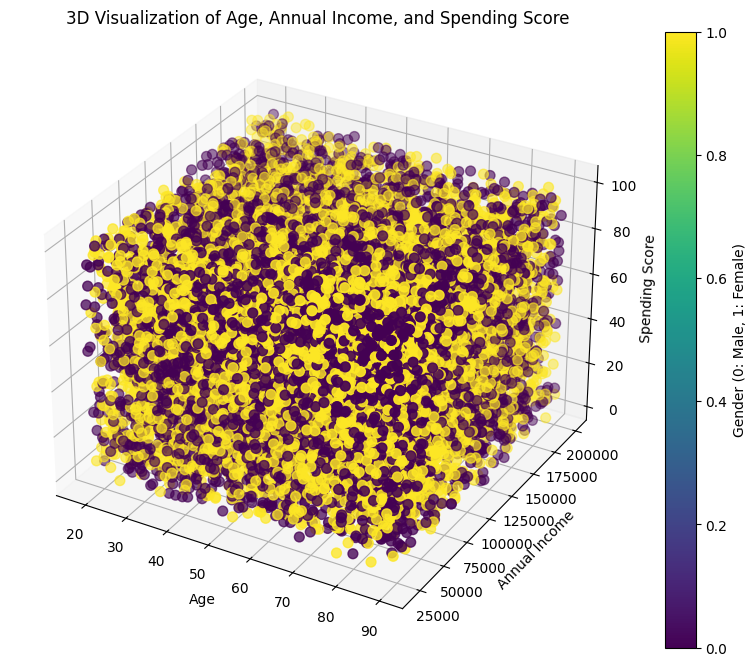

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('shopping-mall-customer-segmentation-data.csv')

# Encode Gender as a numerical variable
label_encoder = LabelEncoder()
data['Gender Encoded'] = label_encoder.fit_transform(data['Gender'])

# Create a correlation matrix heatmap
plt.figure(figsize=(8, 6))
corr_matrix = data[['Age', 'Annual Income', 'Spending Score', 'Gender Encoded']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pair plot for numeric columns
sns.pairplot(data[['Age', 'Annual Income', 'Spending Score', 'Gender Encoded']], hue='Gender Encoded', diag_kind='kde', palette='Set2')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

# 3D Visualization of Spending Score, Age, and Annual Income
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data['Age'],
    data['Annual Income'],
    data['Spending Score'],
    c=data['Gender Encoded'],
    cmap='viridis',
    s=50
)
ax.set_title('3D Visualization of Age, Annual Income, and Spending Score')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.colorbar(scatter, label='Gender (0: Male, 1: Female)')
plt.show()

# K-Means Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting relevant columns for clustering
clustering_data = data[['Annual Income', 'Spending Score']]

# Standardizing the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Displaying the first few rows of the scaled data
clustering_data_scaled[:5]


array([[ 0.79881267,  1.33705873],
       [ 1.44207552,  1.54592857],
       [-0.74320756,  0.88450743],
       [-1.03895267,  0.2230863 ],
       [ 0.84231698,  0.88450743]])

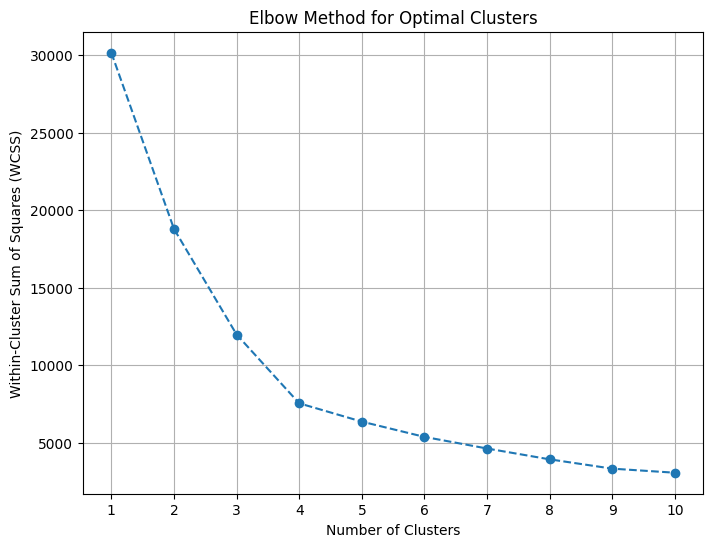

In [ ]:
wcss = []
cluster_range = range(1, 11)  # Trying 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(cluster_range)
plt.grid()
plt.show()

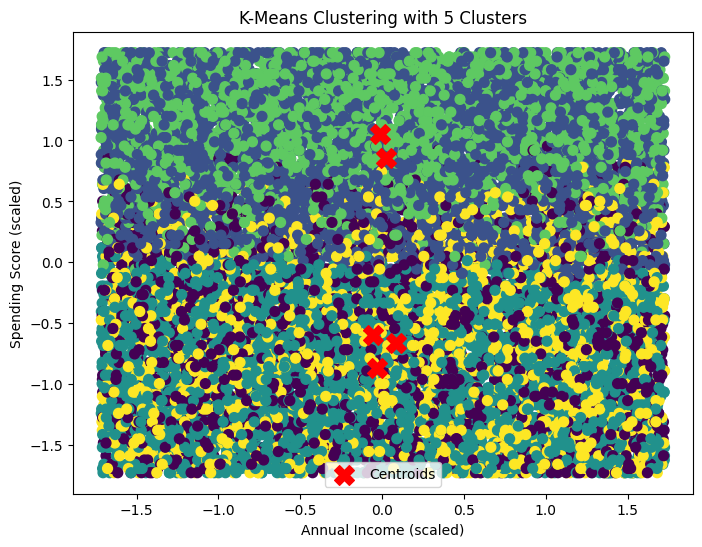

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reloading the dataset
file_path = 'shopping-mall-customer-segmentation-data.csv'
data = pd.read_csv(file_path)

# Encoding gender as a numerical variable
label_encoder = LabelEncoder()
data['Gender Encoded'] = label_encoder.fit_transform(data['Gender'])

# Selecting features for clustering (Income, Spending Score, Age, Gender)
augmented_clustering_data = data[['Annual Income', 'Spending Score', 'Age', 'Gender Encoded']]

# Standardizing the data
scaler = StandardScaler()
augmented_clustering_data_scaled = scaler.fit_transform(augmented_clustering_data)

# Applying K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(augmented_clustering_data_scaled)

# Adding the new cluster labels to the dataset
data['KMeans Cluster (5)'] = kmeans_labels

# Summarizing the new clusters
kmeans_5_summary = data.groupby('KMeans Cluster (5)')[
    ['Annual Income', 'Spending Score', 'Age', 'Gender Encoded']
].mean()
kmeans_5_summary['Customer Count'] = data['KMeans Cluster (5)'].value_counts()

# Displaying the summary of 5 clusters
kmeans_5_summary.reset_index(inplace=True)
kmeans_5_summary

# Visualizing the new clusters
plt.figure(figsize=(8, 6))
plt.scatter(augmented_clustering_data_scaled[:, 0], augmented_clustering_data_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with 5 Clusters')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


Income is not contributing much, every cluster is spread into all income categories(low, moderate & high), which doesn't clearly differentiate the spending habits.
so trying with age and gender as the differentiator, excluding the income.




In [ ]:
# Group by cluster and calculate mean and median for numerical columns
cluster_summary = data.groupby('KMeans Cluster (5)')[['Age', 'Annual Income', 'Spending Score']].agg(['mean', 'median'])

# Print the cluster summary
print(cluster_summary.to_string())

                          Age         Annual Income           Spending Score       
                         mean median           mean    median           mean median
KMeans Cluster (5)                                                                 
0                   34.160369   33.0  106577.972712  104527.5      33.418136   33.0
1                   53.170871   53.0  111121.630429  111702.0      75.187776   75.0
2                   55.324533   56.0  108010.046667  104765.5      25.759467   26.0
3                   55.189170   55.0  109243.849458  108723.5      80.881227   82.0
4                   73.328473   74.0  114081.628645  117476.5      31.532161   31.0


Cluster Details with Age Range and Gender Ratio:
                Age Min  Age Max  Female Ratio Dominance  Customer Count
KMeans Cluster                                                          
0                    18       68           0.0      Male            2308
1                    18       55           1.0    Female            3747
2                    18       78           0.0      Male            2394
3                    54       90           0.0      Male            2782
4                    54       90           1.0    Female            3848

The results have also been saved to 'Cluster_Details_Age_Gender.csv'.


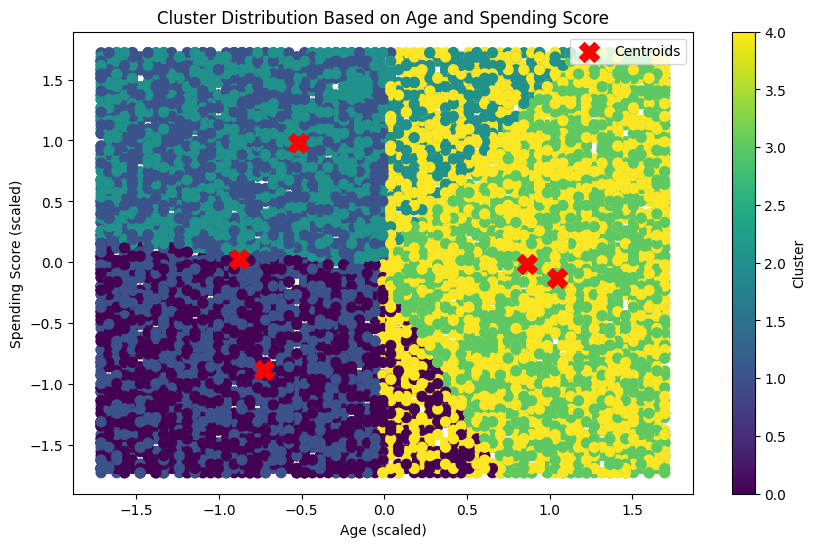

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'shopping-mall-customer-segmentation-data.csv'
data = pd.read_csv(file_path)

# Encode gender as a numerical variable
label_encoder = LabelEncoder()
data['Gender Encoded'] = label_encoder.fit_transform(data['Gender'])

# Selecting features for clustering (Spending Score, Age, Gender)
revised_clustering_data = data[['Spending Score', 'Age', 'Gender Encoded']]

# Standardizing the data
scaler = StandardScaler()
revised_clustering_data_scaled = scaler.fit_transform(revised_clustering_data)

# Applying K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(revised_clustering_data_scaled)

# Adding the new cluster labels to the dataset
data['KMeans Cluster'] = kmeans_labels

# Calculating age range (min and max), gender ratio, and customer count for each cluster
age_range = data.groupby('KMeans Cluster')['Age'].agg(['min', 'max'])
gender_ratio = data.groupby('KMeans Cluster')['Gender Encoded'].mean()  # Proportion of females
gender_dominance = gender_ratio.apply(lambda x: 'Female' if x > 0.5 else 'Male')

# Combine the results into a summary
cluster_details = age_range.copy()
cluster_details['Female Ratio'] = gender_ratio
cluster_details['Dominance'] = gender_dominance
cluster_details['Customer Count'] = data['KMeans Cluster'].value_counts()

# Displaying the cluster details
cluster_details.rename(columns={'min': 'Age Min', 'max': 'Age Max'}, inplace=True)
print("Cluster Details with Age Range and Gender Ratio:")
print(cluster_details)

# Save the results to a CSV file
output_file = 'Cluster_Details_Age_Gender.csv'
cluster_details.to_csv(output_file, index=False)
print(f"\nThe results have also been saved to '{output_file}'.")

# Visualizing the clusters based on Age and Spending Score
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    revised_clustering_data_scaled[:, 1],  # Age (scaled)
    revised_clustering_data_scaled[:, 0],  # Spending Score (scaled)
    c=kmeans_labels, cmap='viridis', s=50
)
plt.scatter(
    kmeans.cluster_centers_[:, 1],  # Age centers
    kmeans.cluster_centers_[:, 0],  # Spending Score centers
    color='red', marker='X', s=200, label='Centroids'
)
plt.title('Cluster Distribution Based on Age and Spending Score')
plt.xlabel('Age (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.colorbar(scatter, label="Cluster")
plt.show()


Cluster Analysis
The clusters are now segmented based on spending score, age, and gender, making them easier to analyze without the influence of income.


Cluster 0 (Male-dominated, Younger to Middle-aged, Low Spending):

Age Range: 18 to 68 years.
Spending Score: Low (scaled around the bottom left in the plot).
Dominance: Male-dominated
Customer Count: 2,308.
Insights:
These are younger to middle-aged, low-spending male customers.
Likely prioritize practical or essential items and are cost-conscious.

Cluster 1 (Female-dominated, Young, Moderate Spending):

Age Range: 18 to 55 years.
Spending Score: Moderate (middle-top of the scatter plot).
Dominance: Female-dominated
Customer Count: 3,747.
Insights:
These are younger, moderate-spending female customers.
Likely interested in trendy or value-for-money items

Cluster 2 (Male-dominated, Broad Age Range, High Spending):

Age Range: 18 to 78 years.
Spending Score: High (right-top region of the scatter plot).
Dominance: Male-dominated
Customer Count: 2,394.
Insights:
These customers span a broad age range and exhibit high spending behavior.
Likely value premium or exclusive items.

Cluster 3 (Male-dominated, Older, Low Spending):

Age Range: 54 to 90 years.
Spending Score: Low (bottom-left of the scatter plot).
Dominance: Male-dominated
Customer Count: 2,782.
Insights:
These are older, low-spending male customers.
Likely focus on affordability and practical purchases

Cluster 4 (Female-dominated, Older, Moderate Spending):

Age Range: 54 to 90 years.
Spending Score: Moderate (middle-right of the scatter plot).
Dominance: Female-dominated
Customer Count: 3,848.
Insights:
These are older, moderate-spending female customers.
Likely purchase practical items with some discretionary spending.


# Hierarchical Clustering

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/shopping-mall-customer-segmentation-data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for initial inspection
data.head()


Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  
0              89  
1              95  
2              76  
3              57  
4              76

Data preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop 'Customer ID' column
data_cleaned = data.drop(columns=['Customer ID'])

# Check for missing values
missing_values = data_cleaned.isnull().sum()

# Encode the 'Gender' column
encoder = LabelEncoder()
data_cleaned['Gender'] = encoder.fit_transform(data_cleaned['Gender'])

# Feature scaling using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_cleaned[['Age','Annual Income','Spending Score']])

# Convert scaled features back into a DataFrame for easier handling
columns =['Age','Annual Income','Spending Score']
scaled_data = pd.DataFrame(scaled_features, columns=columns)
scaled_data['Gender'] = data_cleaned['Gender']


scaled_data = scaled_data[['Age', 'Gender', 'Annual Income', 'Spending Score']]

# Display the scaled data and missing value information
missing_values, scaled_data.head()


(Age               0
 Gender            0
 Annual Income     0
 Spending Score    0
 dtype: int64,
         Age  Gender  Annual Income  Spending Score
 0 -1.145516       1       0.798813        1.337059
 1  0.180335       0       1.442076        1.545929
 2  0.369742       0      -0.743208        0.884507
 3 -1.476979       1      -1.038953        0.223086
 4 -1.429627       1       0.842317        0.884507)

Oulier detection

In [ ]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(data, columns):
    outlier_indices = {}
    for col in columns:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outlier_indices[col] = list(outliers)
    return outlier_indices

# Detect outliers for all columns
outlier_indices = detect_outliers_iqr(scaled_data, scaled_data.columns)

# Display outlier indices count for each column
outlier_summary = {col: len(indices) for col, indices in outlier_indices.items()}
outlier_summary


{'Age': 0, 'Gender': 0, 'Annual Income': 0, 'Spending Score': 0}

The data is evenly distributed for every column , no outliers.

Hierarchical Clustering Dendogram

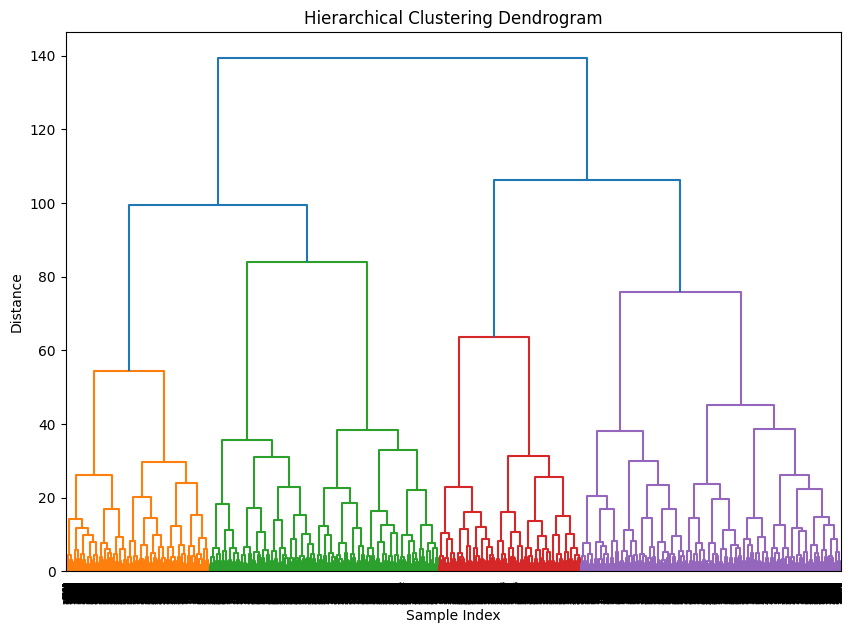

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# Perform hierarchical clustering using the 'ward' linkage method
hierarchical_linkage = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(hierarchical_linkage)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


Agglomerative Coefficient (Cophenetic Correlation): 0.4764


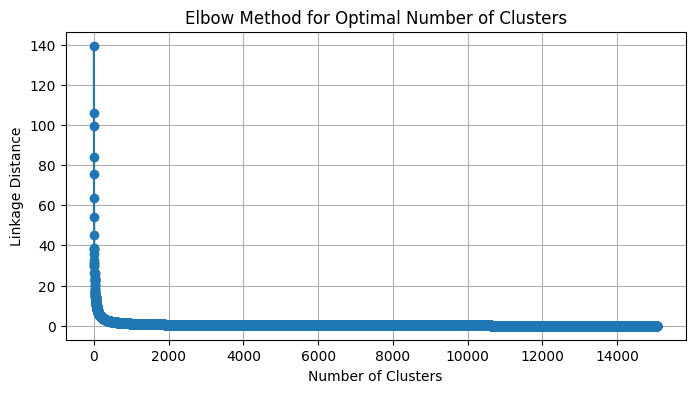

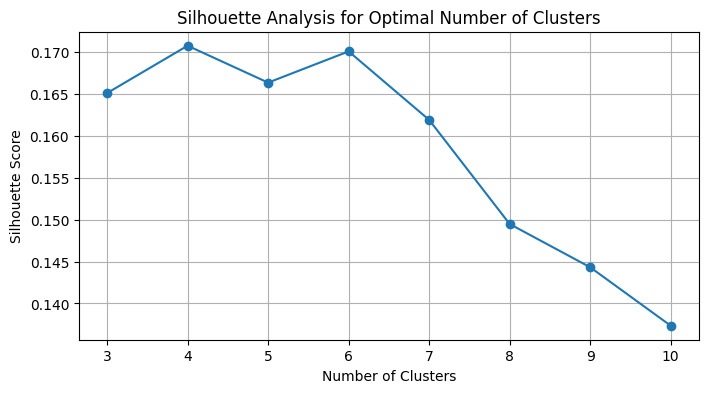

Optimal number of clusters based on Silhouette Score: 3


In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
import numpy as np

# 2. Agglomerative Coefficient (Cophenetic Correlation Coefficient)
coph_dist, coph_linkage = cophenet(hierarchical_linkage, pdist(scaled_data))
print(f"Agglomerative Coefficient (Cophenetic Correlation): {coph_dist:.4f}")

# 3. Elbow Method for Optimal Clusters (Linkage Distances)
# Calculate the distances at each level of the dendrogram
last = hierarchical_linkage[:, 2]  # The distances (heights)
last_rev = last[::-1]
idxs = range(1, len(last) + 1)

plt.figure(figsize=(8, 4))
plt.plot(idxs, last_rev, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Linkage Distance')
plt.grid()
plt.show()

# 4. Silhouette Analysis for Optimal Clusters
silhouette_scores = []

# Try cluster counts from 2 to 10
for n_clusters in range(3, 11):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    cluster_labels = clustering.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Print the optimal number of clusters based on Silhouette Score
optimal_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 since range starts from 2
print(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters}")

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Define the cut-off height or number of clusters
# For demonstration, let's assume we want 4 clusters based on the dendrogram
num_clusters = 4

# Assign cluster labels to each data point based on the hierarchical clustering
hierarchical_labels = fcluster(hierarchical_linkage, num_clusters, criterion='maxclust')

# Add the hierarchical cluster labels to the original dataset
data_cleaned['Cluster'] = hierarchical_labels

# Display the first few rows of the dataset with cluster labels
data_cleaned.head()


Age  Gender  Annual Income  Spending Score  Cluster
0   30       1         151479              89        3
1   58       0         185088              95        1
2   62       0          70912              76        2
3   23       1          55460              57        3
4   24       1         153752              76        3

In [ ]:
# Display basic information about the dataset
data_cleaned.head(), data_cleaned['Cluster'].value_counts()

(   Age  Gender  Annual Income  Spending Score  Cluster
 0   30       1         151479              89        3
 1   58       0         185088              95        1
 2   62       0          70912              76        2
 3   23       1          55460              57        3
 4   24       1         153752              76        3,
 Cluster
 4    5051
 2    4461
 1    2806
 3    2761
 Name: count, dtype: int64)

In [ ]:
df = pd.DataFrame(data_cleaned)

# Calculate average and median for each attribute grouped by Cluster
averages = df.groupby("Cluster").mean()
medians = df.groupby("Cluster").median()

# Combine the results into a single DataFrame
summary = {
    "Average Age": averages["Age"],
    "Average Gender": averages["Gender"],
    "Average Annual Income": averages["Annual Income"],
    "Average Spending Score": averages["Spending Score"],
    "Median Age": medians["Age"],
    "Median Gender": medians["Gender"],
    "Median Annual Income": medians["Annual Income"],
    "Median Spending Score": medians["Spending Score"]
}

summary_df = pd.DataFrame(summary)

summary_df[:]

Average Age  Average Gender  Average Annual Income  \
Cluster                                                       
1          71.746971        0.440485          164507.722381   
2          70.733468        0.455503           76085.563999   
3          32.489678        0.687794          121256.434987   
4          41.692140        0.480697          102751.437141   

         Average Spending Score  Median Age  Median Gender  \
Cluster                                                      
1                     55.635780        73.0            0.0   
2                     57.540238        74.0            0.0   
3                     75.867802        31.0            1.0   
4                     27.835874        41.0            0.0   

         Median Annual Income  Median Spending Score  
Cluster                                               
1                    167041.5                   56.0  
2                     73842.0                   62.0  
3                    128249.0                   77.0  
4                     99072.0                   26.0

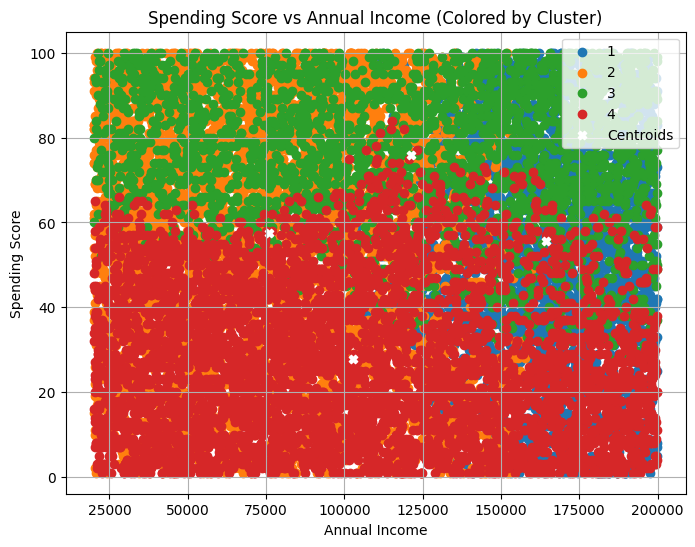

In [ ]:
# Calculate the centroids for each cluster
centroids = data_cleaned.groupby('Cluster').mean()

# Create a scatter plot with cluster coloring
plt.figure(figsize=(8, 6))
for name, group in data_cleaned.groupby('Cluster'):
    plt.scatter(group['Annual Income'], group['Spending Score'], label=name)
plt.scatter(centroids['Annual Income'], centroids['Spending Score'], marker='X', c='white', label='Centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Spending Score vs Annual Income (Colored by Cluster)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

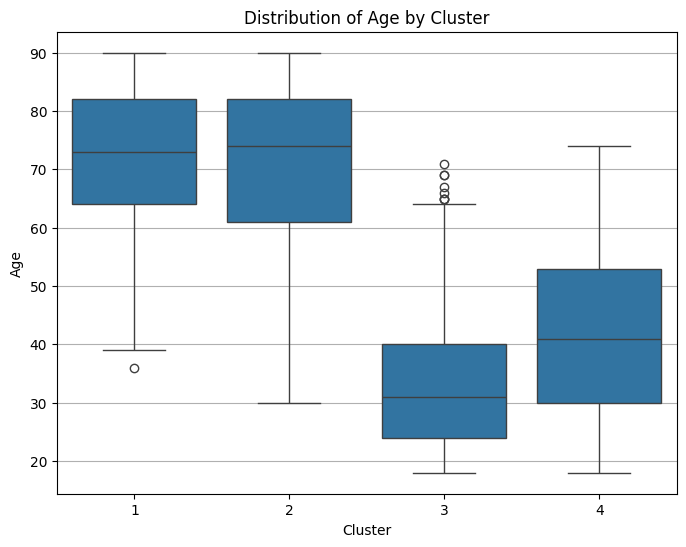

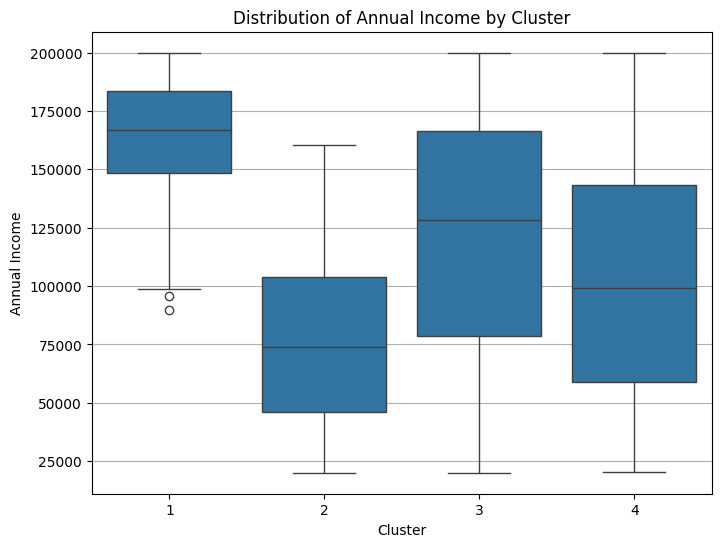

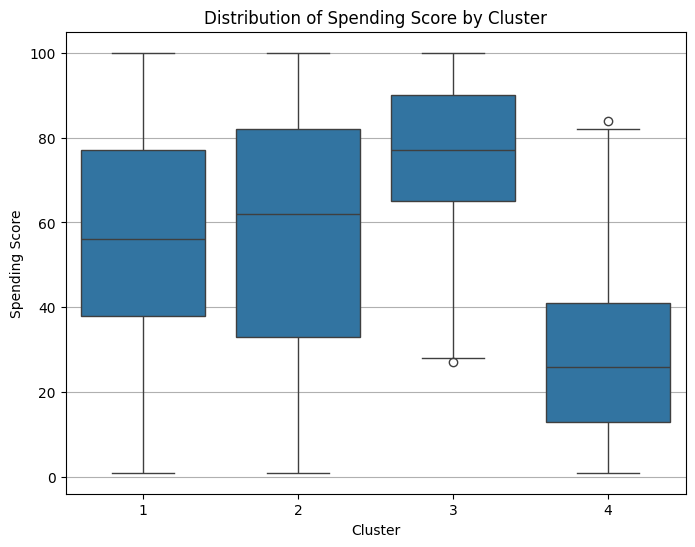

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot feature distributions by cluster
def plot_feature_distributions(data, features, cluster_column='Cluster'):
    for feature in features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=cluster_column, y=feature, data=data)
        plt.title(f'Distribution of {feature} by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(feature)
        plt.grid(axis='y')
        plt.show()

# List of features to analyze
features_to_analyze = ['Age', 'Annual Income', 'Spending Score']

# Plot feature distributions by cluster
plot_feature_distributions(data_cleaned, features_to_analyze)


Cluster 1 Analysis
•	Average Age: 71.75
•	Average Annual Income: 164,507 (highest across all clusters)
•	Average Spending Score: 55.63
•	Gender Distribution: Low female representation with 44.05% females (0.44)
•	Insights:
o	This cluster represents older individuals with high annual incomes.
o	Despite their income, their spending score is relatively moderate, indicating they are less inclined toward spending.
________________________________________
Cluster 2 Analysis
•	Average Age: 70.73
•	Average Annual Income: 76,085 (lowest income among clusters)
•	Average Spending Score: 57.54
•	Gender Distribution: 45.55% females (0.46)
•	Insights:
o	Cluster 2 also represents older individuals but with lower annual incomes compared to Cluster 1.
o	Their spending score is moderate, suggesting they spend proportionally to their income level.
o	Lower spending and income might indicate individuals in retirement or on fixed incomes.
________________________________________
Cluster 3 Analysis
•	Average Age: 32.49 (youngest group)
•	Average Annual Income: 121,256
•	Average Spending Score: 75.87 (highest spending score)
•	Gender Distribution: 68.78% females (0.69)
•	Insights:
o	This cluster comprises younger individuals with moderate to high incomes.
o	They have the highest spending scores, suggesting this group is more likely to spend on goods/services.
o	The higher female representation might reflect purchasing behavior patterns in this demographic.
________________________________________
Cluster 4 Analysis
•	Average Age: 41.69
•	Average Annual Income: 102,751
•	Average Spending Score: 27.83 (lowest spending score)
•	Gender Distribution: 48.07% females (0.48)
•	Insights:
o	This cluster consists of middle-aged individuals with moderate annual incomes.
o	Despite having reasonable incomes, their spending score is the lowest, indicating conservative spending habits.
o	The gender distribution is balanced, suggesting diverse participation across genders.
________________________________________
Key Takeaways
1.	Cluster 1 and Cluster 2: Represent older individuals but differ significantly in income. Cluster 1 has higher incomes but moderate spending, while Cluster 2 has lower incomes.
2.	Cluster 3: Represents the youngest and most spendthrift group, with high incomes and high spending scores.
3.	Cluster 4: Represents middle-aged individuals with moderate incomes but very conservative spending patterns.


GMM(Gaussian Mixture Model)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = 'shopping-mall-customer-segmentation-data.csv'
data = pd.read_csv(file_path)

# Drop 'Customer ID' column (not useful for clustering)
data_cleaned = data.drop(columns=['Customer ID'])

# Check for missing values
missing_values = data_cleaned.isnull().sum()

# Encode 'Gender' column
encoder = LabelEncoder()
data_cleaned['Gender'] = encoder.fit_transform(data_cleaned['Gender'])

# Feature scaling using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_cleaned[['Age', 'Annual Income', 'Spending Score']])

# Convert scaled features back into a DataFrame
columns = ['Age', 'Annual Income', 'Spending Score']
scaled_data = pd.DataFrame(scaled_features, columns=columns)
scaled_data['Gender'] = data_cleaned['Gender']

# Arrange the columns for clarity
scaled_data = scaled_data[['Age', 'Gender', 'Annual Income', 'Spending Score']]
scaled_data.head(), missing_values


(        Age  Gender  Annual Income  Spending Score
 0 -1.145516       1       0.798813        1.337059
 1  0.180335       0       1.442076        1.545929
 2  0.369742       0      -0.743208        0.884507
 3 -1.476979       1      -1.038953        0.223086
 4 -1.429627       1       0.842317        0.884507,
 Age               0
 Gender            0
 Annual Income     0
 Spending Score    0
 dtype: int64)

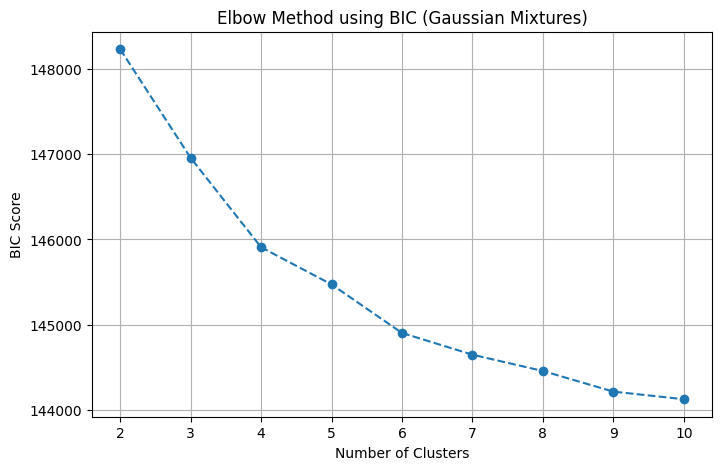

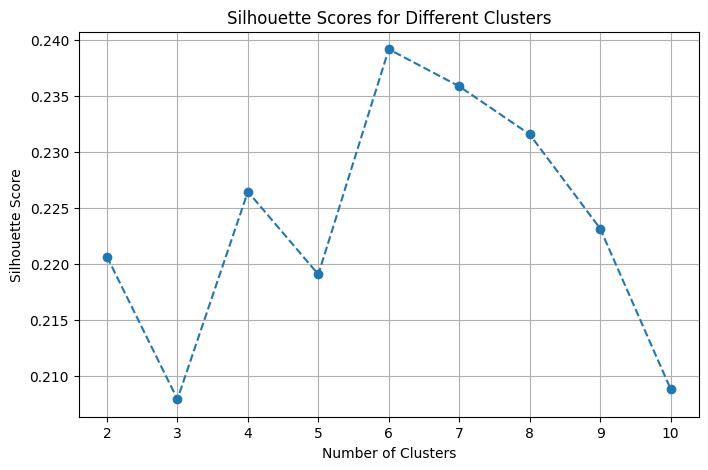

6

In [ ]:
# Step 1: Elbow Method for optimal clusters
n_clusters = range(2, 11)
gmm_models = [GaussianMixture(n_components=k, random_state=42).fit(scaled_data) for k in n_clusters]
gmm_bics = [model.bic(scaled_data) for model in gmm_models]

# Plotting the BIC scores
plt.figure(figsize=(8, 5))
plt.plot(n_clusters, gmm_bics, marker='o', linestyle='--')
plt.title("Elbow Method using BIC (Gaussian Mixtures)")
plt.xlabel("Number of Clusters")
plt.ylabel("BIC Score")
plt.grid(True)
plt.show()

# Step 2: Silhouette Scores for each cluster count
silhouette_scores = []
for k in n_clusters:
    gmm = GaussianMixture(n_components=k, random_state=42)
    cluster_labels = gmm.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the best cluster count based on silhouette score
best_cluster_count = n_clusters[np.argmax(silhouette_scores)]

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for Different Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

best_cluster_count

6


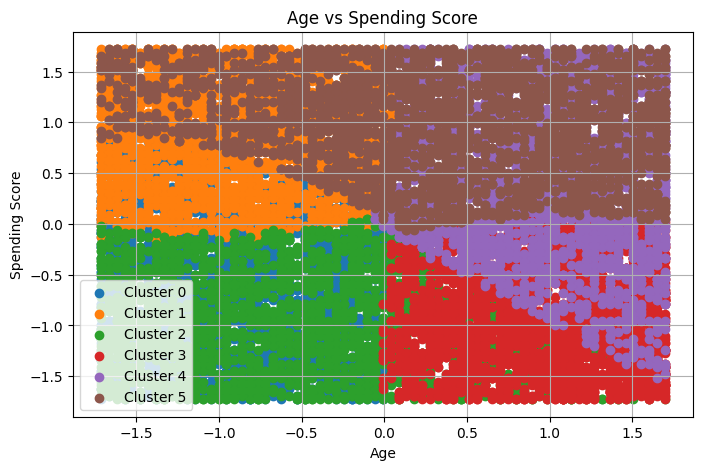

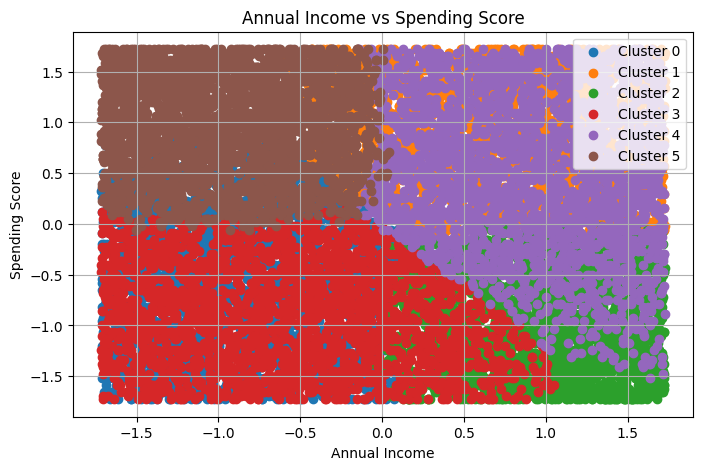

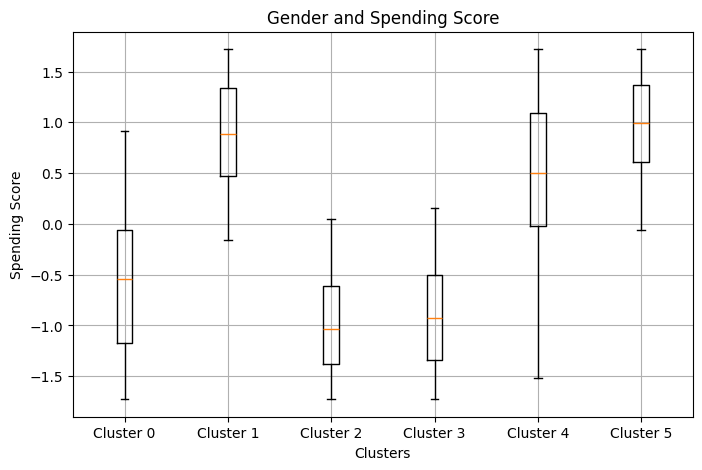

In [ ]:

# Remove Gender column temporarily for clustering
data_for_clustering = scaled_data.drop(columns=['Gender'])

# Re-add Gender as it was
scaled_data['Gender'] = scaled_data['Gender']

print(best_cluster_count)
# Fit GMM with the optimal number of clusters
gmm = GaussianMixture(n_components=best_cluster_count, random_state=42)
scaled_data['Cluster'] = gmm.fit_predict(data_for_clustering)



# Plot 1: Age vs Spending Score
plt.figure(figsize=(8, 5))
for cluster in range(best_cluster_count):
    cluster_data = scaled_data[scaled_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Spending Score'], label=f"Cluster {cluster}")
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Annual Income vs Spending Score
plt.figure(figsize=(8, 5))
for cluster in range(best_cluster_count):
    cluster_data = scaled_data[scaled_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income'], cluster_data['Spending Score'], label=f"Cluster {cluster}")
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.grid(True)
plt.show()


# Plot 3: Gender and Spending Score (box plot)
plt.figure(figsize=(8, 5))
for cluster in range(best_cluster_count):
    cluster_data = scaled_data[scaled_data['Cluster'] == cluster]
    plt.boxplot(cluster_data['Spending Score'], positions=[cluster], labels=[f'Cluster {cluster}'])
plt.title("Gender and Spending Score")
plt.xlabel("Clusters")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()



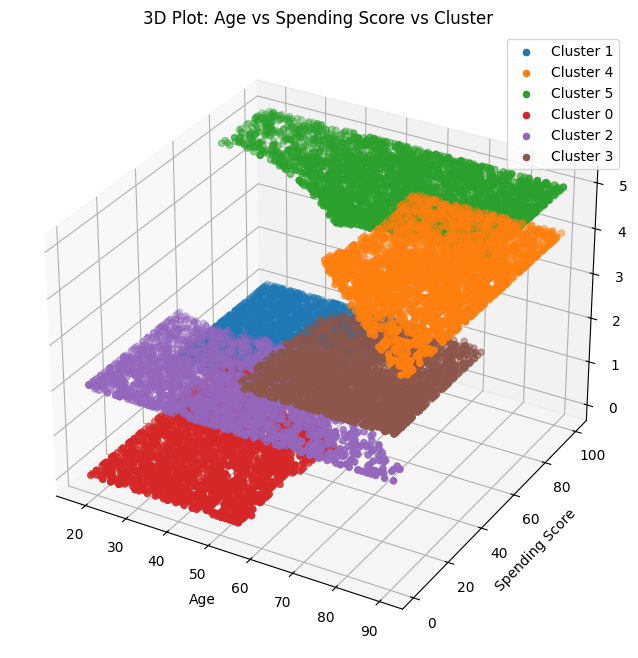

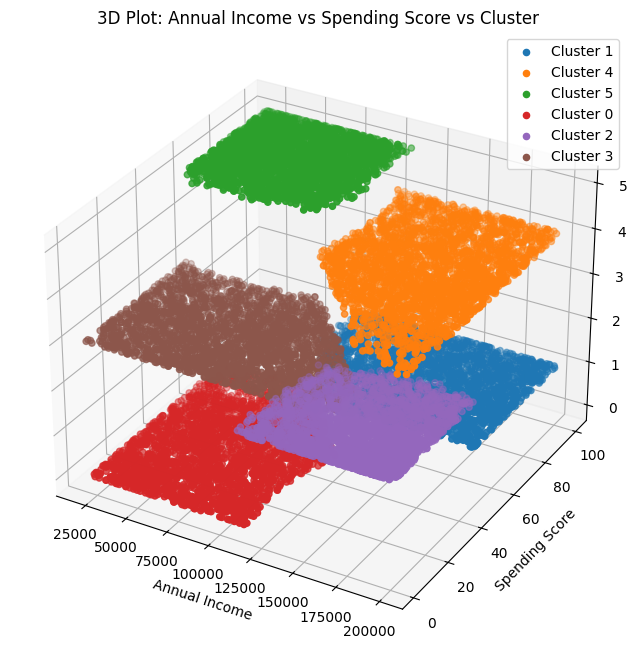

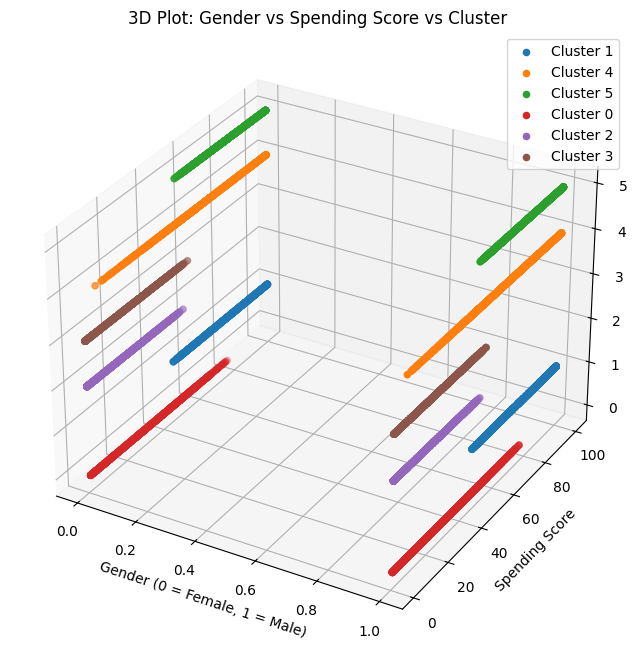

In [ ]:


# Add original columns for interpretation
scaled_data['Gender'] = data_cleaned['Gender'].map({0: 'Female', 1: 'Male'})
scaled_data['Age_Original'] = data_cleaned['Age']
scaled_data['Income_Original'] = data_cleaned['Annual Income']
scaled_data['Spending_Score_Original'] = data_cleaned['Spending Score']

# Plot 3D scatter: Age vs Spending Score vs Cluster
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in scaled_data['Cluster'].unique():
    cluster_data = scaled_data[scaled_data['Cluster'] == cluster]
    ax.scatter(cluster_data['Age_Original'], cluster_data['Spending_Score_Original'], cluster_data['Cluster'], label=f"Cluster {cluster}")
ax.set_title("3D Plot: Age vs Spending Score vs Cluster")
ax.set_xlabel("Age")
ax.set_ylabel("Spending Score")
ax.set_zlabel("Cluster")
ax.legend()
plt.show()

# Plot 3D scatter: Annual Income vs Spending Score vs Cluster
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in scaled_data['Cluster'].unique():
    cluster_data = scaled_data[scaled_data['Cluster'] == cluster]
    ax.scatter(cluster_data['Income_Original'], cluster_data['Spending_Score_Original'], cluster_data['Cluster'], label=f"Cluster {cluster}")
ax.set_title("3D Plot: Annual Income vs Spending Score vs Cluster")
ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
ax.set_zlabel("Cluster")
ax.legend()
plt.show()

# Convert Gender to numeric values
scaled_data['Gender_Numeric'] = scaled_data['Gender'].map({'Female': 0, 'Male': 1})

# 3D Scatter: Gender vs Spending Score vs Cluster
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in scaled_data['Cluster'].unique():
    cluster_data = scaled_data[scaled_data['Cluster'] == cluster]
    ax.scatter(cluster_data['Gender_Numeric'], cluster_data['Spending_Score_Original'], cluster_data['Cluster'], label=f"Cluster {cluster}")
ax.set_title("3D Plot: Gender vs Spending Score vs Cluster")
ax.set_xlabel("Gender (0 = Female, 1 = Male)")
ax.set_ylabel("Spending Score")
ax.set_zlabel("Cluster")
ax.legend()
plt.show()



Cluster Summary:
                Income      Score        Age
Cluster                                     
0         62457.522908  35.734192  34.987505
1        143000.429648  76.849665  34.951424
2        158562.184119  23.519634  41.643106
3         81552.350792  23.547706  73.971579
4        157605.799704  63.446415  73.810052
5         60876.126690  77.786404  63.314407


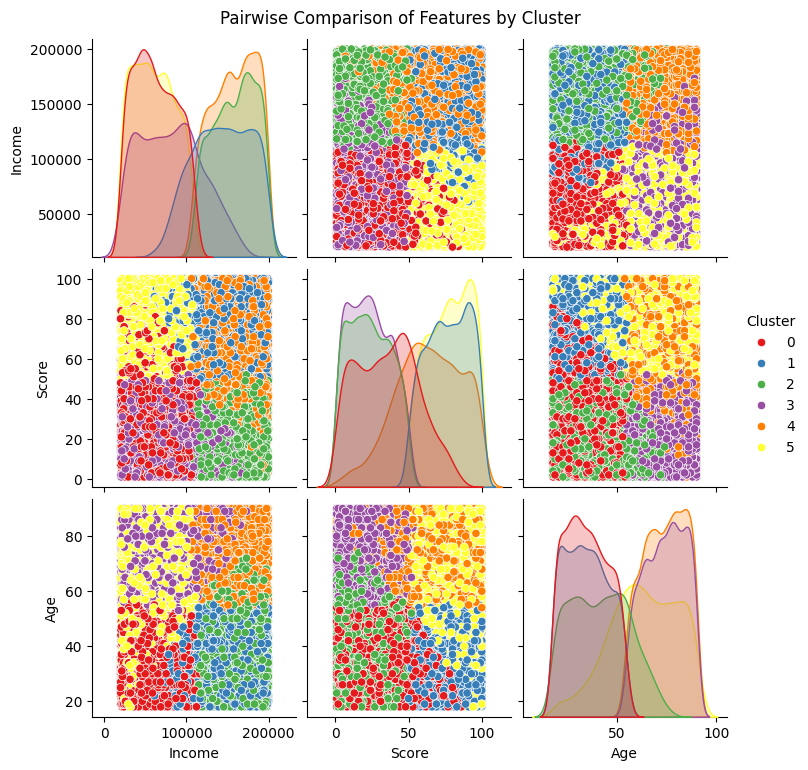

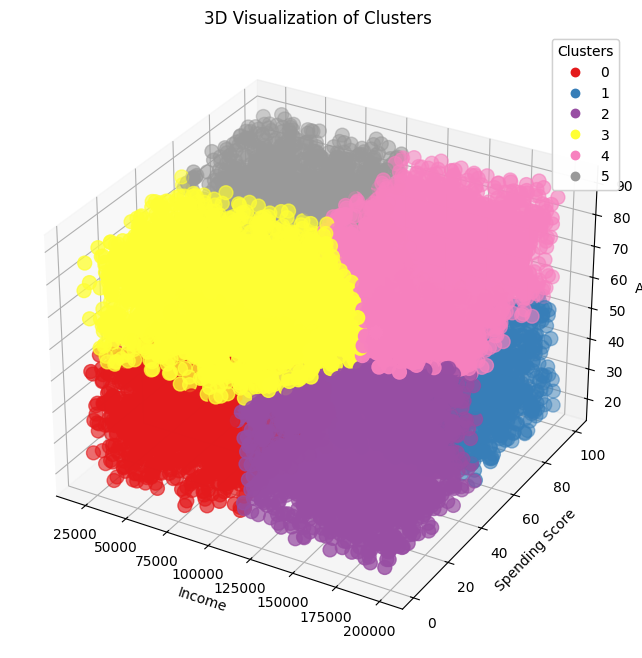

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['Age', 'Income', 'Score']])
data_scaled = pd.DataFrame(scaled_features, columns=['Age', 'Income', 'Score'])

# Apply Gaussian Mixture Model (GMM) for clustering
gmm = GaussianMixture(n_components=6, random_state=42)  # Adjust n_components as needed
data_scaled['Cluster'] = gmm.fit_predict(data_scaled)

# Merge Cluster results back into the original dataset
data['Cluster'] = data_scaled['Cluster']

# Explore the cluster details by summarizing mean values for each feature
cluster_summary = data.groupby('Cluster')[['Income', 'Score', 'Age']].mean()
print("Cluster Summary:")
print(cluster_summary)

# Visualize clusters in a pairwise plot comparing features: Income, Score, and Age
sns.pairplot(data, hue='Cluster', vars=['Income', 'Score', 'Age'], palette='Set1')
plt.suptitle('Pairwise Comparison of Features by Cluster', y=1.02)
plt.show()

# Visualize the clusters with Income, Score, and Age in 3D for a more detailed comparison
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(data['Income'], data['Score'], data['Age'], c=data['Cluster'], cmap='Set1', s=100)
ax.set_xlabel('Income')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Age')
ax.set_title('3D Visualization of Clusters')

# Add a legend for clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [ ]:
# Display summary statistics for clusters
cluster_summary = scaled_data.groupby(['Cluster', 'Gender']).agg({
    'Age': 'mean',
    'Annual Income': 'mean',
    'Spending Score': 'mean'
}).reset_index()

cluster_summary

Cluster  Gender       Age  Annual Income  Spending Score
0         0  Female -0.886480      -0.870029       -0.586433
1         0    Male -0.901547      -0.866678       -0.574572
2         1  Female -0.893367       0.703142        0.877324
3         1    Male -0.909196       0.689534        0.881252
4         2  Female -0.497014       0.963433       -0.983843
5         2    Male -0.456549       0.972888       -0.986580
6         3  Female  0.933136      -0.576070       -0.910496
7         3    Male  0.936092      -0.604846       -0.910414
8         4  Female  0.932078       0.895656        0.501824
9         4    Male  0.937197       0.887809        0.489736
10        5  Female  0.320278      -0.945975        0.984620
11        5    Male  0.282461      -0.943245        0.966029

This table displays clustered data resulting from Gaussian Mixture Model (GMM) clustering. Let me explain the table columns and insights step-by-step:


Cluster:
The cluster number assigned to each data point.
It indicates which group the record belongs to after clustering.

Gender:
'Male' or 'Female' indicates the gender of the individual in that row.

Age:
The standardized (scaled) value of the Age variable.
Negative or positive values represent deviations from the mean, as the data was scaled using StandardScaler.

Annual Income:
The standardized value of Annual Income.
Similar to "Age," it shows how each individual deviates from the average annual income.

Spending Score:
The standardized Spending Score.
Higher positive or lower negative values indicate how actively someone spends relative to the group mean.

Insights:
Clusters:
There are at least 6 clusters (Cluster 0 to Cluster 5), each grouping individuals with similar spending patterns, age, and income.

Gender Distribution:
Each cluster has both Male and Female members, but further analysis or visualization can show which gender dominates each cluster.
Age and Income:

For example:
Row 0: Cluster 0 has a Female with below-average Age, Annual Income, and Spending Score.
Row 5: Cluster 2 has a Male with below-average Annual Income and Spending Score.
Spending Behavior:

Positive Spending Score values (e.g., Clusters 3 and 4) indicate individuals who spend more than the average.
Negative Spending Score values (e.g., Clusters 0, 1, and 2) represent more conservative spenders.

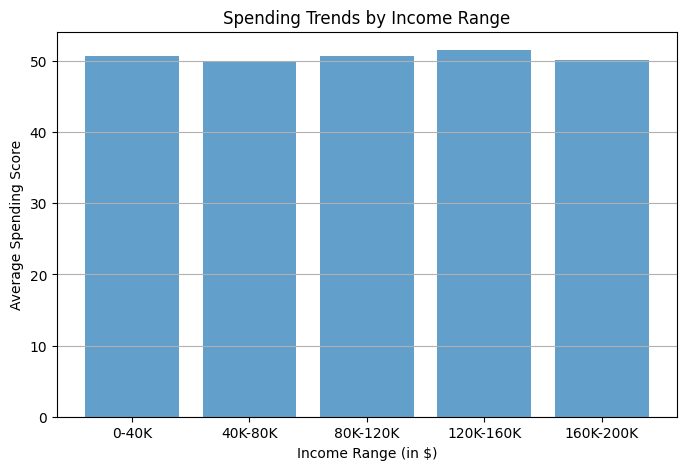

Income Range  Spending Score
0        0-40K       50.669971
1      40K-80K       50.053147
2     80K-120K       50.674161
3    120K-160K       51.537830
4    160K-200K       50.084001

In [ ]:
# Define income bins (ranges)
income_bins = [0, 40000, 80000, 120000, 160000, 200000]
income_labels = ['0-40K', '40K-80K', '80K-120K', '120K-160K', '160K-200K']
data_cleaned['Income Range'] = pd.cut(data_cleaned['Annual Income'], bins=income_bins, labels=income_labels)

# Calculate average spending score for each income range
spending_trends = data_cleaned.groupby('Income Range', observed=False)['Spending Score'].mean().reset_index()

# Re-visualize the spending trends
plt.figure(figsize=(8, 5))
plt.bar(spending_trends['Income Range'], spending_trends['Spending Score'], alpha=0.7)
plt.title("Spending Trends by Income Range")
plt.xlabel("Income Range (in $)")
plt.ylabel("Average Spending Score")
plt.grid(axis='y')
plt.show()

spending_trends

Analysis of Spending Trends by Income Range

For each income range, I calculated the average Spending Score:

**Average Spending Score** = Sum of all Spending Scores in a bin / Total no of individuals in that bin

The groupby('Income Range') function aggregates the data by income bins, and the .mean() function calculates the average.

Income Ranges:
Data is grouped into five income ranges: 0-40K, 40K-80K, 80K-120K, 120K-160K, and 160K-200K.

Spending Score Trends:
Average Spending Scores are fairly consistent across all income ranges, hovering around 50–51.
The 120K-160K income group has the highest average Spending Score (~51.5), indicating slightly higher spending behavior.
The 40K-80K and 160K-200K ranges have slightly lower average spending scores (~50).

Insights:
Spending patterns appear relatively stable regardless of income levels.
Individuals in the middle-income range (120K-160K) spend slightly more, which could be a segment to target for business strategies.

In [ ]:
# Gender-wise cluster distribution
gender_cluster_distribution = scaled_data.groupby(['Cluster', 'Gender']).size().reset_index(name='Count')
gender_cluster_distribution

Cluster  Gender  Count
0         0  Female   1286
1         0    Male   1307
2         1  Female   1163
3         1    Male   1187
4         2  Female   1195
5         2    Male   1151
6         3  Female   1216
7         3    Male   1214
8         4  Female   1279
9         4    Male   1358
10        5  Female   1345
11        5    Male   1378

Cluster Analysis Insights and Targeted Marketing Plans
1. Cluster Distribution for Each Gender
Observation: The clusters contain varying proportions of males and females.
This helps in understanding whether specific spending patterns are gender-dominant, enabling targeted strategies.
2. Business Insights from Clusters:
a. Age vs Spending Score (3D Plot):

Younger individuals (e.g., 20–35) tend to belong to clusters with higher spending scores.
Marketing Strategy: Target younger customers with promotions on lifestyle products or tech-related offerings.
b. Annual Income vs Spending Score:

Customers with medium to high incomes exhibit diverse spending behaviors across clusters.
Some higher-income groups show lower spending scores:
Opportunity: Upsell premium products or loyalty programs to motivate spending.
c. Gender vs Spending Score:

Both males and females are distributed across all clusters. However, clusters with higher spending scores may have gender dominance.
Marketing Strategy: Use gender-specific campaigns. For example:
Females with high spending scores → Offer personalized promotions on fashion and lifestyle.
Males with moderate spending → Target electronics or automotive products.
Cluster Results for Decision-Making:
Target High-Spending Clusters:

Identify and prioritize clusters with high average spending scores for premium product launches.
Engage Low-Spending Clusters:

For clusters with low spending, introduce budget-friendly products or value-driven offers to drive engagement.
Demographic-Specific Promotions:

Age and gender insights allow precise targeted campaigns.
For example, younger individuals in high-spending clusters can be targeted via social media campaigns.

# Contribution:

*   Data Analysis: All
*   Data Visualization: Abha
*   Preprocessing: Shivram
*   K-means Clustering: Abha
*   Hierarchical Clustering: Shivram
*   Gaussian Mixture Model: Sanket